# Collect Tweets from particular geocode from Google map

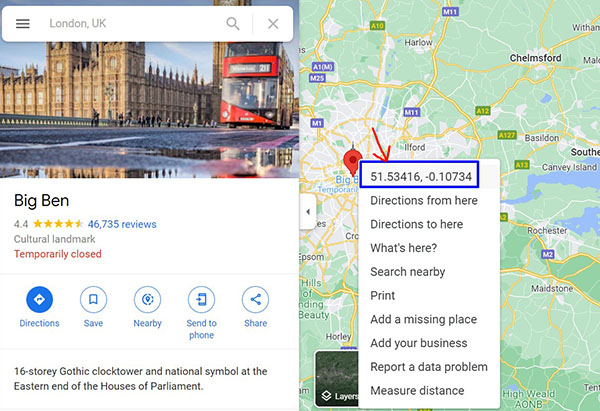

# A. With API: with tweepy
To collect Tweets around particular location
https://docs.tweepy.org/en/stable/api.html#get-information-about-a-place

In [2]:
import tweepy
import csv
import pandas as pd
import os

# Twitter Developer API

In [3]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

# Twitter Trending Now

In [4]:
#https://www.woeids.com/ # WOEID of London
woeid = 44418
trendingnow = API.get_place_trends(id = woeid)
print("Trending now in London:")
 
for trend in trendingnow:
    trends = []
    for tr in trend['trends']:
        trends.append(tr['name'])
print(trends)    

Trending now in London:
['#fridaymorning', 'Daily Quordle 172', 'Tasha', '#JackInTheBox', '#FridayFeeling', '#ToryLeadershipRace', 'Mordaunt', 'Deji', 'Truss', '#bbcqt', 'Danica', 'Lord Frost', 'Equal Sign', 'Kemi', 'hobi', 'Zinchenko', 'Rhod', 'Alpe', 'JUNG HOSEOK', 'Tom Pidcock', 'PANDORAS BOX', 'Sunak', 'ECHR', 'Becky Hill', 'Bassey', 'Josh', 'Ivana Trump', 'Monday and Tuesday', 'Reece Topley', 'Eddie Dempsey', 'Luca', 'Telford', 'Martinez', 'Barca', 'Alba', 'Braverman', 'TV-14', 'Femi', 'steve lacy', 'Hoyle', 'Vinnytsia', 'Khloe', 'De Jong', 'Colwill', 'Morning Mark', 'Louis Vuitton', 'Morning Paul', 'Koulibaly', 'Drake', 'Frenkie']


In [8]:
search_key = "Boris"
csvFile = open(search_key+".csv", "a+",newline="", encoding = "utf-8")
csvWriter = csv.writer(csvFile)
c = [] #date creted
i = [] #id of tweet
l = [] #location
u = [] #username
t = [] #text

max_tweets = 10
n = 0
for tweet in tweepy.Cursor(API.search_tweets, q=search_key, lang="en",since_id="2022-07-14", until='2022-07-15').items():
    print(tweet.created_at, tweet.id, tweet.user.name,tweet.text)
    c.append(tweet.created_at)
    i.append(tweet.id)
    l.append(tweet.user.location)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    n += 1    
    
    if n > max_tweets:
        break
          
    tweets=[tweet.created_at, tweet.id,tweet.user.location,tweet.user.name,tweet.text.encode("utf-8")]
    csvWriter.writerow(tweets)

dictTweets = {"time":c, "id":i,"location":l,"username":u,"text":t}
df = pd.DataFrame(dictTweets, columns=["time","id","location","username","text"])
df.head()

2022-07-14 23:59:57+00:00 1547732665402396672 Hamsar @rulajebreal @ICC Delusional take from Medvedev and him assigning credit were none is due. Boris eventually fell af… https://t.co/WCWfJZ2kR5
2022-07-14 23:59:54+00:00 1547732653004038146 sanik@linux:~$ ./🛫 —origin=KUL —destination=DPS RT @kylenabecker: Breaking News.🚨

Estonian prime minister Kaja Kallas has just resigned.

This follows upon the resignation announcements…
2022-07-14 23:59:48+00:00 1547732626718437382 Gustavo Zhiang 🇷🇺🇲🇽🇨🇳 @Osinttechnical for kill innocent people! STOP NEO NAZI EMPIRE OF WESTERN!! FALL OF ZELENKSY!!! Boris, Petkov, Rata… https://t.co/CWbLVBBvB7
2022-07-14 23:59:47+00:00 1547732623073501184 bexibettyboo🇬🇧🇺🇦 RT @politicalite: DIRTY DOUGIE: Boris Johnson ‘THREATENED’ into resigning by Tory close to Rishi Sunak   https://t.co/VytWRGNxFd via @polit…
2022-07-14 23:59:45+00:00 1547732613309181953 Jackie Downing @AlaModliszewski @BorisEP @kimguilfoyle @EricGreitens @maureen_bannon @CortesSteve He IS. Sometime

,time,id,location,username,text
0,2022-07-14 23:59:57+00:00,1547732665402396672,,Hamsar,b'@rulajebreal @ICC Delusional take from Medve...
1,2022-07-14 23:59:54+00:00,1547732653004038146,"Legian, Bali",sanik@linux:~$ ./🛫 —origin=KUL —destination=DPS,b'RT @kylenabecker: Breaking News.\xf0\x9f\x9a...
2,2022-07-14 23:59:48+00:00,1547732626718437382,Mexicali,Gustavo Zhiang 🇷🇺🇲🇽🇨🇳,b'@Osinttechnical for kill innocent people! ST...
3,2022-07-14 23:59:47+00:00,1547732623073501184,,bexibettyboo🇬🇧🇺🇦,b'RT @politicalite: DIRTY DOUGIE: Boris Johnso...
4,2022-07-14 23:59:45+00:00,1547732613309181953,"Upstate, NY",Jackie Downing,b'@AlaModliszewski @BorisEP @kimguilfoyle @Eri...


In [ ]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_tweepy.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet', 'location', 'hashtags']) 

#Radius around 20 km around particular geocode
max_tweets = 100
date_since = "2022-07-01"
date_until = "2022-07-14"
for n,tweet in enumerate(API.search_tweets('geocode:51.53416,-0.10734,300km', lang='en',\
                                          since_id = 'date_since')):
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.screen_name, tweet.text, tweet.user.location, \
                                     tweet.entities['hashtags']])       
tweet_data.close()

In [ ]:
dfA = pd.read_csv('London_tweets_tweepy.csv')
#dfA = dfA.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
dfA.head(15)

In [ ]:
len(dfA)

In [ ]:
import pandas as pd
import tweepy
 
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
 
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'scraped_tweets.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)
 
if __name__ == '__main__':
 
        # Enter your own credentials obtained
        # from your developer account
        consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
        consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
        access_key = "XXXXXXXXXXXXXXXXXXXXX"
        access_secret = "XXXXXXXXXXXXXXXXXXXXX"
 
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
        print("Enter Twitter HashTag to search for")
        words = input()
        print("Enter Date since The Tweets are required in yyyy-mm--dd")
        date_since = input()
 
        # number of tweets you want to extract in one run
        numtweet = 100
        scrape(words, date_since, numtweet)
        print('Scraping has completed!')

In [ ]:
import numpy as np
import tweepy
import snscrape.modules.twitter as sntwitter
import csv
import string
from collections import Counter
#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import re

# B. Without API: with snscrape
To collect Tweets around particular geocode location

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import snscrape.modules.twitter as sntwitter
import itertools
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string

In [ ]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_sns.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet','hashtags']) 

#Radius around 20 km around particular geocode
max_tweets = 200
for n,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.53416,-0.10734,30km \
        + since:2022-07-13 until:2022-07-14 -filter:links -filter:replies').get_items()):
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.username, tweet.content, tweet.hashtags])      
tweet_data.close()

In [ ]:
df = pd.read_csv('London_tweets_sns.csv')
df=df.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
df.head()

## Pre-processing, Cleaning

In [ ]:
df.isnull().sum()

In [ ]:
def cleaning(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub('\[.*?\]', '', tweets_data)
    tweets_data = re.sub('https?://\S+|www\.\S+', '', tweets_data)  
    tweets_data = re.sub('\n', '', tweets_data)
    tweets_data = re.sub('<.*?>+', '', tweets_data)
    tweets_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_data)
    tweets_data = re.sub('\w*\d\w*', '', tweets_data)   
    return tweets_data

def clean(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub("['']", '', tweets_data)
    return tweets_data

In [ ]:
df['Cleaned_Tweets'] = df['tweet'].apply(cleaning)
df['Cleaned_Hashtags'] = df['hashtags'].apply(clean)
df.head()

In [ ]:
htag_Texts=df['Cleaned_Hashtags'].values
Tweets_String=str(htag_Texts)
htag_Texts_Cleaned = Tweets_String.lower()
htag_Texts_Cleaned=re.sub(r'@\w+', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned=re.sub(r'http\S+', ' ', htag_Texts_Cleaned) 
htag_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' +', ' ', htag_Texts_Cleaned)
print(htag_Texts_Cleaned)

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

hashtag_count = word_count(htag_Texts_Cleaned)
print(hashtag_count)

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(hashtag_count.keys(), hashtag_count.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

## 5 Most Popular hastags

In [ ]:
MostPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:5]
print(MostPopularHashtags)

## 5 Most Active Users

In [ ]:
#df['user'].unique()
userlist = df['username'].value_counts()
most_active_users = userlist.head(5)
most_active_users

In [ ]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.savefig("Piechart",transparent=False, bbox_inches='tight',pad_inches=0.1)

## Sentiment Analysis with nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

In [ ]:
df1 = df.drop(columns = ['username','hashtags'])
df1.head(5)

In [ ]:
#df1.value_counts()
sid.polarity_scores(df1.loc[0]['tweet'])

In [ ]:
df1.dropna(inplace=True)
blanks = []  
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)  
df1.drop(blanks, inplace=True)

In [ ]:
#df1['tweet'].value_counts()
df1['score'] = df1['tweet'].apply(lambda review: sid.polarity_scores(review))
df1['compound']  = df1['score'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment'] = df1['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df1.head(10)

In [ ]:
df1['tweet'][1]

In [ ]:
df1['tweet'][9]

# Topic extraction with LDA (Latent Dirichlet Allocation)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
dm = countv.fit_transform(df1['tweet'])
dm

In [ ]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dm)

In [ ]:
countv.get_feature_names()[1111]

In [ ]:
len(countv.get_feature_names())

In [ ]:
import random
for i in range(5):
    random_word_id = random.randint(0,1120)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
for i in range(4):
    random_word_id = random.randint(0,1232)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
LDA.components_

In [ ]:
len(LDA.components_[0])

In [ ]:
eachtopic = LDA.components_[0]

In [ ]:
eachtopic.argsort()

In [ ]:
eachtopic[183]

In [ ]:
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

In [ ]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'5 Most common discussed topic #{index}')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
dm

In [ ]:
dm.shape

In [ ]:
topic_res = LDA.transform(dm)

In [ ]:
topic_res.shape

In [ ]:
topic_res[0]

In [ ]:
topic_res[0].round(2)

In [ ]:
topic_res[0].argmax()

In [ ]:
df1.head()

In [ ]:
topic_res.argmax(axis=1)

In [ ]:
df1['Topic'] = topic_res.argmax(axis=1)

In [ ]:
df1.head(5)

# Topic Modeling using NMF (Non-Negative Matric Factorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
dm = tfidf.fit_transform(df1['tweet'])
dm

In [ ]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dm)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'Most common discussed topic #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
topic_res = nmf_model.transform(dm)
topic_res.argmax(axis=1)
df1['Topic'] = topic_res.argmax(axis=1)
df1.head(10)